This notebook includes the analysis of the results of the paper "On the use of a multimodal optimizer for fitting neuron models. Application to the cerebellar granule cell",M. Marín et al.(2021),Front. in Neuroinformatics. 

# Base imports

In [3]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
#%matplotlib notebook
#import seaborn as sns
#sns.set(style="darkgrid")

import matplotlib.pyplot as plt
import nest
import numpy
import pdb
import sys 
import os

# Utility functions

In [9]:
# Files used to calculate each feature and score in the fitness function
sys.path.insert(1,'/home/mmarin/gitHubRepositories/Multimodal-optimization-for-fitting-cerebellar-GrCs/src/ObjectiveFunction/')
import SpikingSimulation.CurrentSimulation as CurrentSimulation
import SpikingSimulation.Features.MeanFrequency as MeanFrequency
import SpikingSimulation.Features.Latency as Latency
import SpikingSimulation.Features.BF_sd as BF_sd

# Some utility functions for simulating and analyzing the resulting neuron population
import functions

# Configuration file that only contains the default values for some internal variables of the src
config_file = './EANeuronModel_raw_basic_wo_seed.cfg' 

# UEGO RESULTS: POPULATION OF NEURONS ANALYZED IN THE PAPER

In [13]:
sys.path.insert(1,'/home/mmarin/gitHubRepositories/Multimodal-optimization-for-fitting-cerebellar-GrCs/results/')
import results_UEGO_60k as uego60k
# Extraction of the candidate configurations and their total scores generated by the algorithm execution.
dict_total_ind, dict_total_fit =uego60k.getResultUEGO_60k_E2() 
for i in range(0,len(dict_total_ind)):
    dict_total_ind[i].append(0.001) # Adding the default value of the parameter "tref" needed for the Nest aeif_cond_exp model (AdEx model) 
#pp.pprint(dict_total_ind) # Print the population of neuron configurations
#pp.pprint(dict_total_fit) # Print the total score of each neuron configuration
print 'Population of neurons = ',len(dict_total_ind)

Population of neurons =  25


# SCORE ANALYSIS AND REPRESENTATION OF EACH NEURON

### The next cell represents each of the neuron configuration of the resulting population from the workflow. In this analysis, firstly the neuron configuration is printed, then the feature scores, and finally some plots are represented: the spiking resonance, bursts plots and finally I-F and first-spike latency plots.  

In [14]:
show=True #True for plotting the graphics, False for not plotting them in this noteboook.
savefig=False # True for saving the plot, False for not saving it. 


 
NEURON 1
	 Parameter configuration:
{   'a': 1.2305945282694373e-10,
    'b': -9.998472663833964e-10,
    'cm': 4.225802172929736e-12,
    'delta_t': 0.05588139497076256,
    'erest': -0.07922524278167772,
    'espike': -0.019981145683855703,
    'eth': -0.020446012905153542,
    'grest': 3.3328556400509713e-10,
    'tref': 0.001,
    'tw': 0.007137508729479229,
    'vreset': -0.07663839785499513}

 	 Feature and total score:
{   'feature_Burst_Frequency': 57.64183204583235,
    'feature_Latency': 7.35,
    'feature_Mean_Frequency': 29.0,
    'total_score_obtained_in_UEGO': 93.991832}


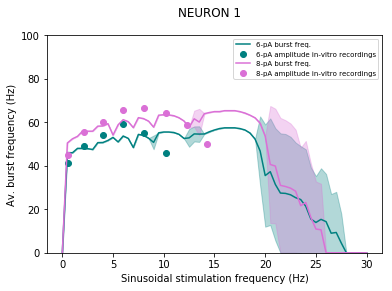

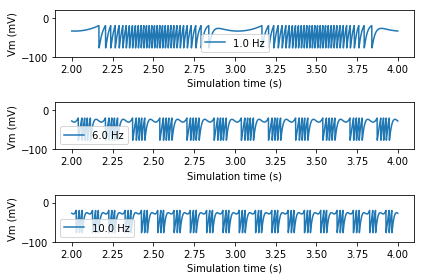

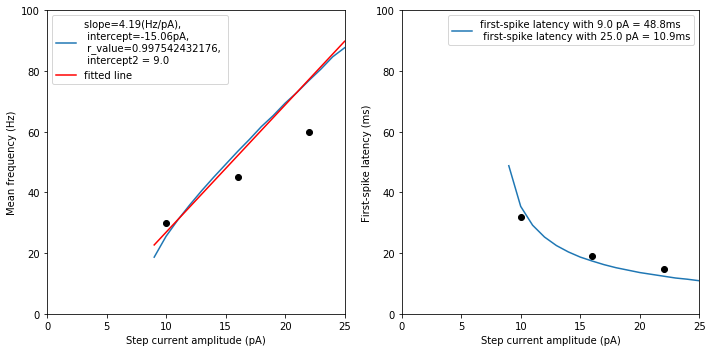


 
NEURON 2
	 Parameter configuration:
{   'a': 2.0211942863984134e-10,
    'b': 1.398492155753093e-10,
    'cm': 4.399792533964841e-12,
    'delta_t': 0.054382051404931006,
    'erest': -0.06719423686022967,
    'espike': -0.007077809882505752,
    'eth': -0.03814939864478801,
    'grest': 1.5509457844399663e-12,
    'tref': 0.001,
    'tw': 0.07344149740582574,
    'vreset': -0.043458127030672165}

 	 Feature and total score:
{   'feature_Burst_Frequency': 61.35617198256388,
    'feature_Latency': 4.549999999999994,
    'feature_Mean_Frequency': 37.0,
    'total_score_obtained_in_UEGO': 102.906172}


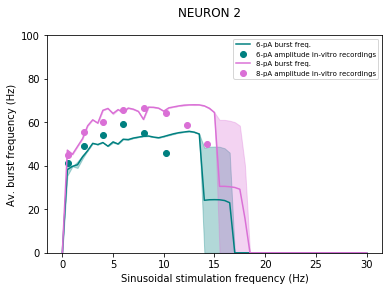

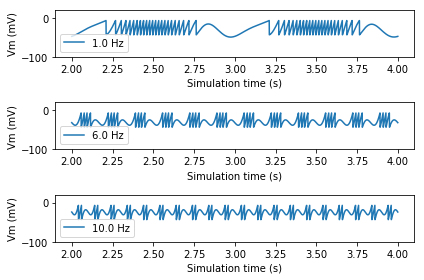

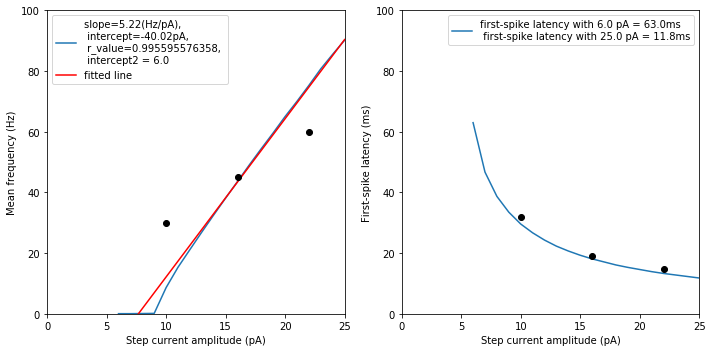


 
NEURON 3
	 Parameter configuration:
{   'a': 2.2300779903436193e-10,
    'b': -4.289259972856559e-10,
    'cm': 4.408481833247137e-12,
    'delta_t': 0.6534684559666518,
    'erest': -0.06652681591466889,
    'espike': -0.01998396136387164,
    'eth': -0.05452662864108663,
    'grest': 2.7091080756679072e-12,
    'tref': 0.001,
    'tw': 0.0017003848612645778,
    'vreset': -0.07156802699763551}

 	 Feature and total score:
{   'feature_Burst_Frequency': 60.6724793083487,
    'feature_Latency': 12.850000000000009,
    'feature_Mean_Frequency': 33.0,
    'total_score_obtained_in_UEGO': 106.522479}


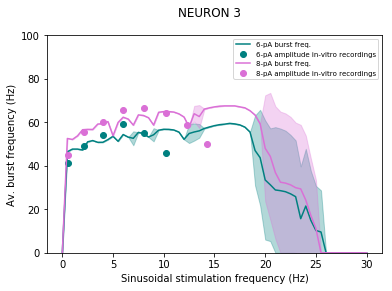

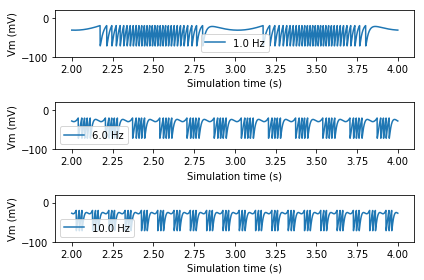

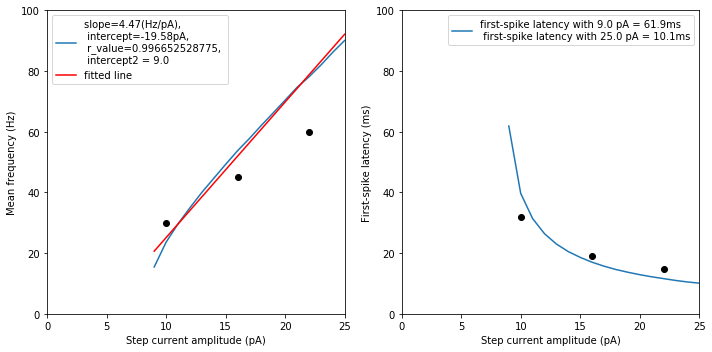


 
NEURON 4
	 Parameter configuration:
{   'a': 1.3859070019095325e-10,
    'b': 1e-09,
    'cm': 4.9975653657435176e-12,
    'delta_t': 0.792296004536065,
    'erest': -0.07603747544251435,
    'espike': -0.01573128607724861,
    'eth': -0.02000002680840881,
    'grest': 1.3773146178928825e-12,
    'tref': 0.001,
    'tw': 0.012717111443994827,
    'vreset': -0.056917090301078506}

 	 Feature and total score:
{   'feature_Burst_Frequency': 75.85821855793246,
    'feature_Latency': 6.8500000000000085,
    'feature_Mean_Frequency': 26.0,
    'total_score_obtained_in_UEGO': 108.708219}


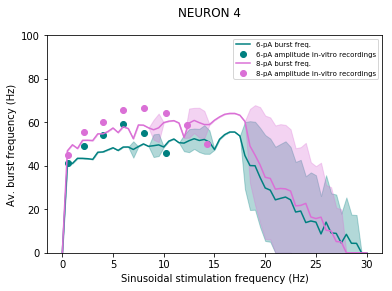

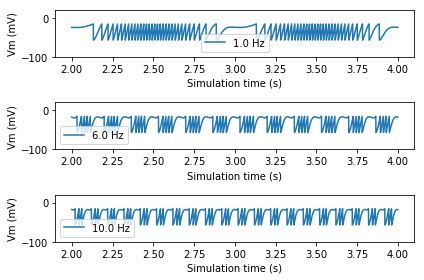

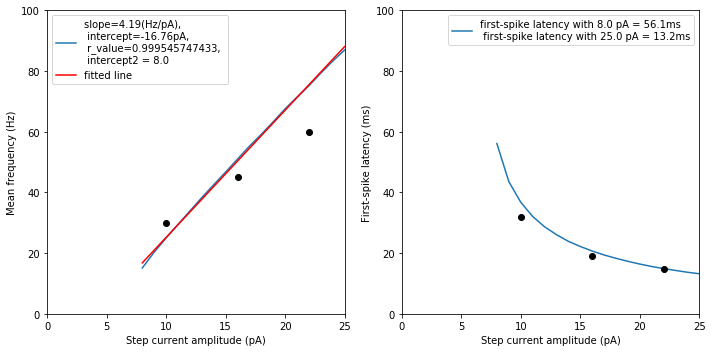


 
NEURON 5
	 Parameter configuration:
{   'a': 2.4433872894101664e-10,
    'b': -9.459366492336183e-10,
    'cm': 4.7413904766902e-12,
    'delta_t': 0.055820071594513486,
    'erest': -0.07998482434075026,
    'espike': 0.00784092367010342,
    'eth': -0.024829410099130818,
    'grest': 7.413447740172787e-09,
    'tref': 0.001,
    'tw': 0.001039409317304495,
    'vreset': -0.0799723603807997}

 	 Feature and total score:
{   'feature_Burst_Frequency': 63.602205655682894,
    'feature_Latency': 18.050000000000004,
    'feature_Mean_Frequency': 35.0,
    'total_score_obtained_in_UEGO': 116.652206}


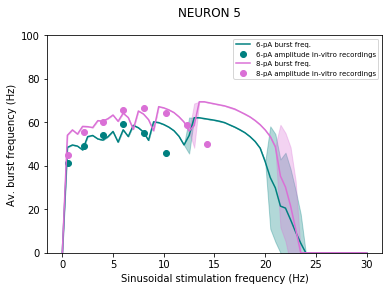

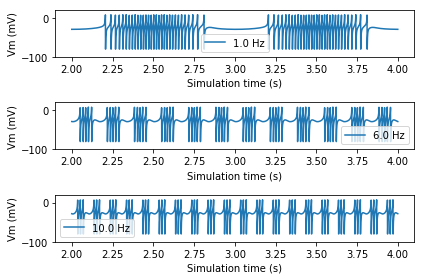

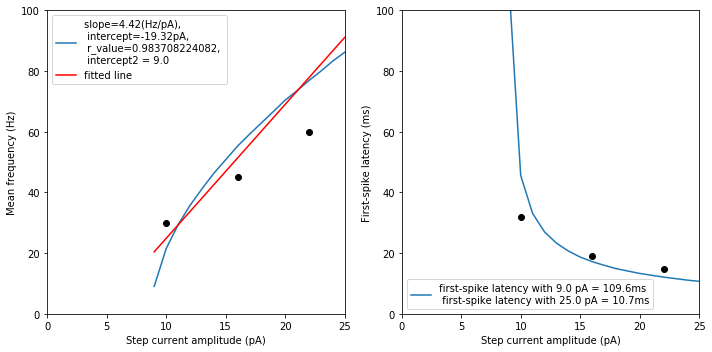


 
NEURON 6
	 Parameter configuration:
{   'a': -9.687240098694335e-12,
    'b': 8.056999338699485e-11,
    'cm': 4.32405576712212e-12,
    'delta_t': 0.03648022626145565,
    'erest': -0.0634209521754019,
    'espike': 0.003858772102261949,
    'eth': -0.024928756735631503,
    'grest': 3.742332226097707e-09,
    'tref': 0.001,
    'tw': 0.790811153829154,
    'vreset': -0.05506866959670498}

 	 Feature and total score:
{   'feature_Burst_Frequency': 80.81899089715667,
    'feature_Latency': 7.350000000000003,
    'feature_Mean_Frequency': 33.0,
    'total_score_obtained_in_UEGO': 121.168991}


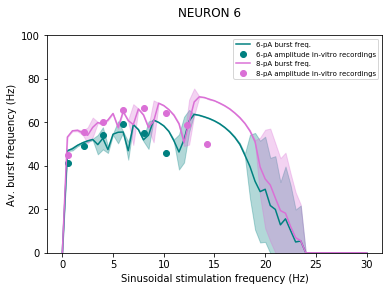

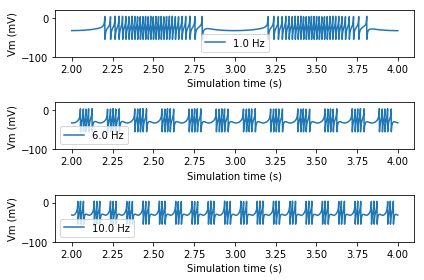

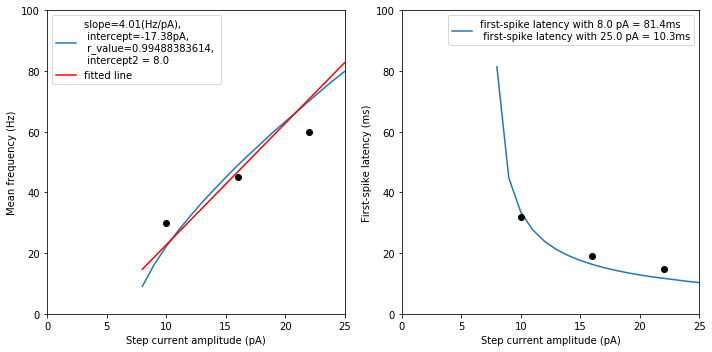


 
NEURON 7
	 Parameter configuration:
{   'a': -6.909919486766509e-11,
    'b': 8.906583764925223e-11,
    'cm': 4.302705373090603e-12,
    'delta_t': 0.0011164871471789476,
    'erest': -0.05150075703049911,
    'espike': -0.018914485817725722,
    'eth': -0.024208343803528216,
    'grest': 3.415215620227131e-10,
    'tref': 0.001,
    'tw': 0.27324300085752906,
    'vreset': -0.07787189204219844}

 	 Feature and total score:
{   'feature_Burst_Frequency': 87.3595176603957,
    'feature_Latency': 18.250000000000004,
    'feature_Mean_Frequency': 21.0,
    'total_score_obtained_in_UEGO': 126.609518}


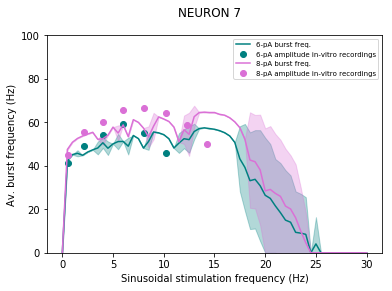

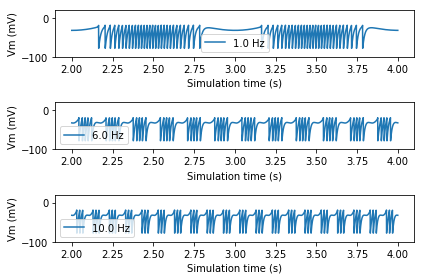

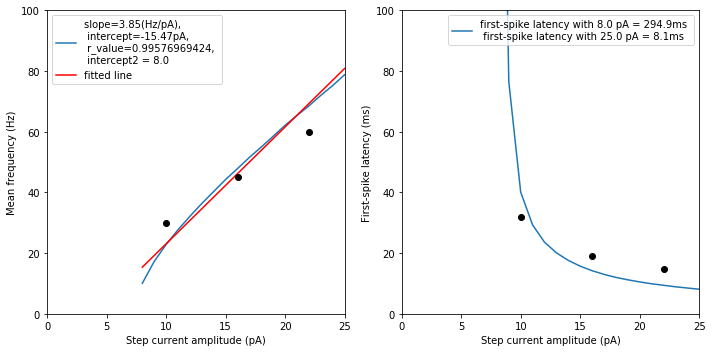


 
NEURON 8
	 Parameter configuration:
{   'a': 1.2620253474580043e-10,
    'b': -2.6718925642620473e-10,
    'cm': 3.4234811847810425e-12,
    'delta_t': 0.6313090984685393,
    'erest': -0.07398095462090382,
    'espike': 0.008171070247206251,
    'eth': -0.025613192248793736,
    'grest': 4.949136429284093e-12,
    'tref': 0.001,
    'tw': 0.008874564254189216,
    'vreset': -0.06797266757962256}

 	 Feature and total score:
{   'feature_Burst_Frequency': 110.35260055101442,
    'feature_Latency': 2.949999999999989,
    'feature_Mean_Frequency': 17.0,
    'total_score_obtained_in_UEGO': 130.302601}


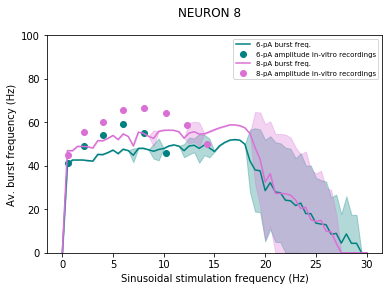

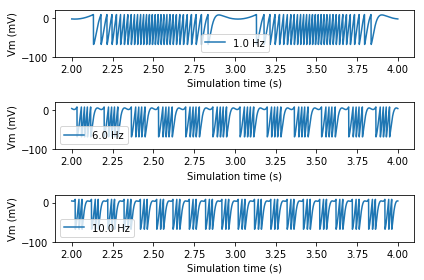

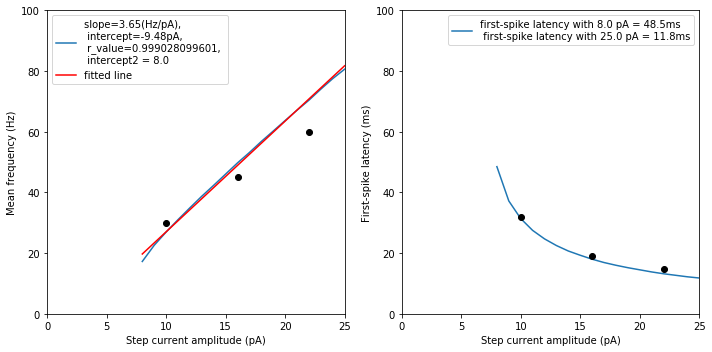


 
NEURON 9
	 Parameter configuration:
{   'a': 2.286294709055454e-10,
    'b': 2.8297736070846036e-11,
    'cm': 2.4734156327620315e-12,
    'delta_t': 0.25270319667846924,
    'erest': -0.045792008114262685,
    'espike': 0.011269129282705608,
    'eth': -0.05212278231180796,
    'grest': 1e-12,
    'tref': 0.001,
    'tw': 0.19322118706587108,
    'vreset': -0.06886109958207905}

 	 Feature and total score:
{   'feature_Burst_Frequency': 95.00408155966856,
    'feature_Latency': 33.05,
    'feature_Mean_Frequency': 50.0,
    'total_score_obtained_in_UEGO': 178.054082}


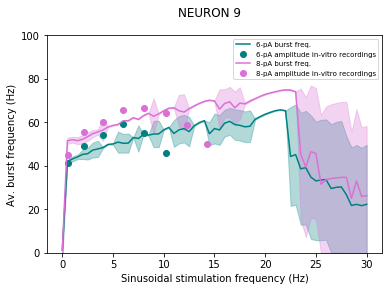

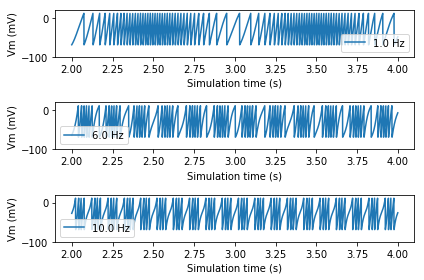

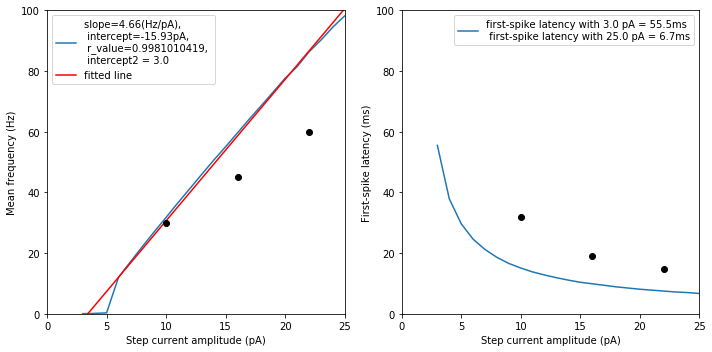


 
NEURON 10
	 Parameter configuration:
{   'a': 2.733550126016111e-11,
    'b': -8.501225127216428e-10,
    'cm': 4.989126126907265e-12,
    'delta_t': 0.9994545038989721,
    'erest': -0.045028035528713185,
    'espike': 0.01999246222696729,
    'eth': -0.06,
    'grest': 1.4357556456822754e-12,
    'tref': 0.001,
    'tw': 0.3019474484425327,
    'vreset': -0.0709971558442862}

 	 Feature and total score:
{   'feature_Burst_Frequency': 156.96826962596717,
    'feature_Latency': 3.449999999999995,
    'feature_Mean_Frequency': 29.0,
    'total_score_obtained_in_UEGO': 189.41827}


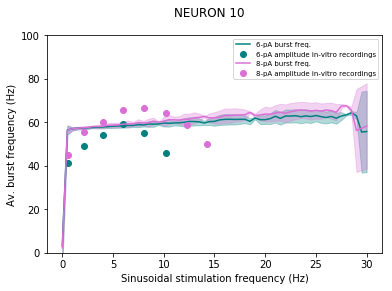

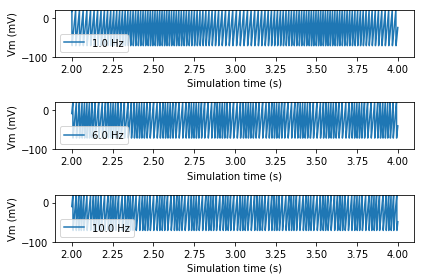

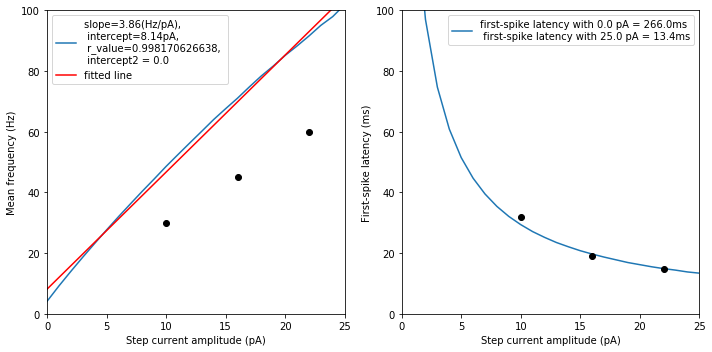


 
NEURON 11
	 Parameter configuration:
{   'a': 2.4517075524883583e-10,
    'b': 5.127337412566659e-10,
    'cm': 2.5976580157771746e-12,
    'delta_t': 0.09102797871780305,
    'erest': -0.07048794787027418,
    'espike': -0.008854035065416628,
    'eth': -0.05626761539675543,
    'grest': 8.969590965007617e-11,
    'tref': 0.001,
    'tw': 0.8123256135991225,
    'vreset': -0.07854148669950141}

 	 Feature and total score:
{   'feature_Burst_Frequency': 133.2679368833888,
    'feature_Latency': 41.449999999999996,
    'feature_Mean_Frequency': 18.0,
    'total_score_obtained_in_UEGO': 192.717937}


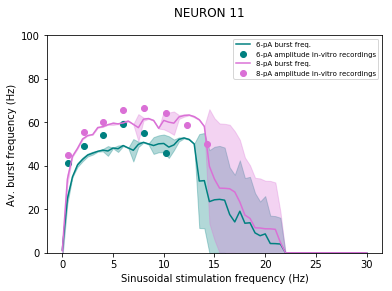

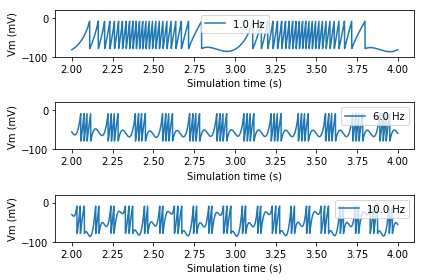

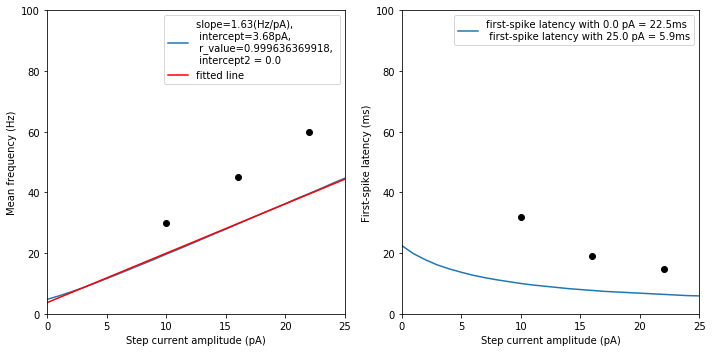


 
NEURON 12
	 Parameter configuration:
{   'a': 9.812224056206048e-10,
    'b': 7.255410677251826e-10,
    'cm': 4.22420187642868e-12,
    'delta_t': 0.37001015651526387,
    'erest': -0.06646609510591613,
    'espike': -0.015273236427083574,
    'eth': -0.037669612932198844,
    'grest': 7.959738398683855e-11,
    'tref': 0.001,
    'tw': 0.6786891172024856,
    'vreset': -0.0554783132547836}

 	 Feature and total score:
{   'feature_Burst_Frequency': 133.50467670548284,
    'feature_Latency': 48.949999999999996,
    'feature_Mean_Frequency': 45.0,
    'total_score_obtained_in_UEGO': 227.454677}


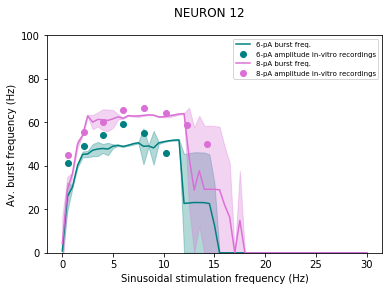

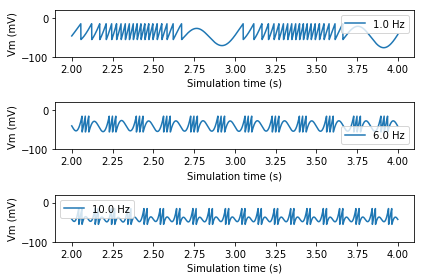

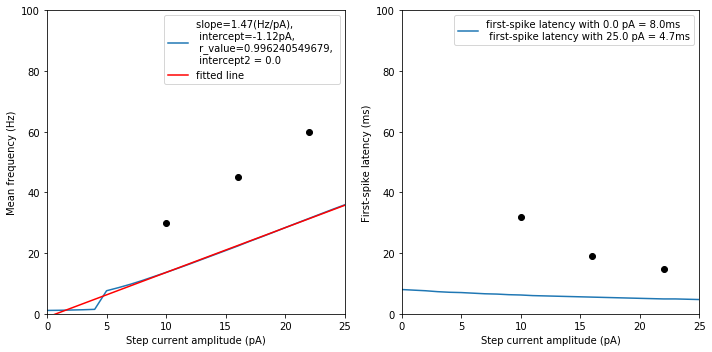


 
NEURON 13
	 Parameter configuration:
{   'a': 9.889688743691697e-10,
    'b': -8.49723375315887e-10,
    'cm': 3.547954455744094e-12,
    'delta_t': 0.02169950481491026,
    'erest': -0.07049273829775649,
    'espike': 0.019949282308608794,
    'eth': -0.048882541535440895,
    'grest': 4.132581341066913e-09,
    'tref': 0.001,
    'tw': 0.11592427598971587,
    'vreset': -0.07251377172246015}

 	 Feature and total score:
{   'feature_Burst_Frequency': 192.8458924485085,
    'feature_Latency': 43.449999999999996,
    'feature_Mean_Frequency': 96.0,
    'total_score_obtained_in_UEGO': 332.295892}


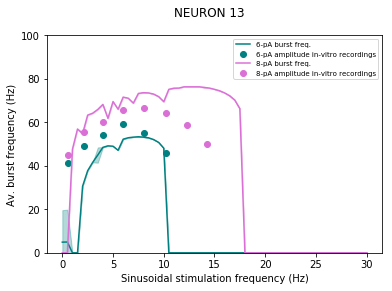

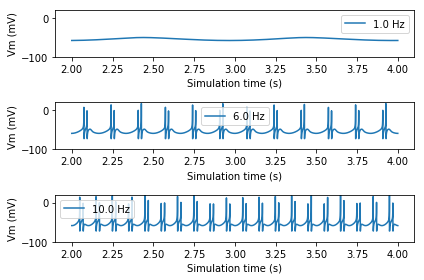

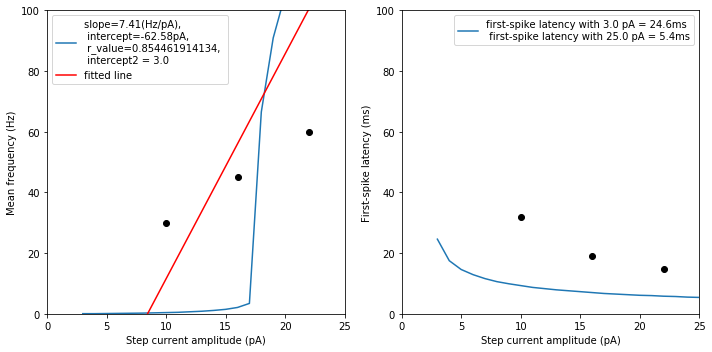


 
NEURON 14
	 Parameter configuration:
{   'a': 5.595716316833177e-10,
    'b': 7.530436496105926e-10,
    'cm': 4.0202880544766265e-12,
    'delta_t': 0.08501811048329797,
    'erest': -0.04381950271502837,
    'espike': 0.019999937608638853,
    'eth': -0.02996383659692586,
    'grest': 5.677049777311429e-10,
    'tref': 0.001,
    'tw': 0.7660048292381835,
    'vreset': -0.07714398784789002}

 	 Feature and total score:
{   'feature_Burst_Frequency': 193.34978886170722,
    'feature_Latency': 51.349999999999994,
    'feature_Mean_Frequency': 102.0,
    'total_score_obtained_in_UEGO': 346.699789}


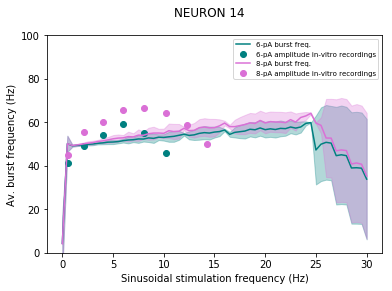

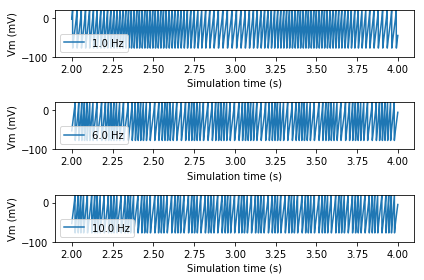

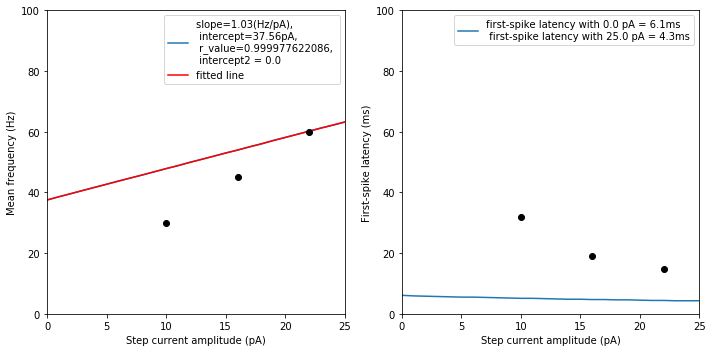


 
NEURON 15
	 Parameter configuration:
{   'a': 5.878940062986193e-10,
    'b': 9.94684545373047e-10,
    'cm': 3.1241268027322132e-12,
    'delta_t': 0.3960309043804251,
    'erest': -0.07132677304337474,
    'espike': 0.01171975787007554,
    'eth': -0.05999985936707369,
    'grest': 1.319462796672471e-10,
    'tref': 0.001,
    'tw': 0.6909744127065662,
    'vreset': -0.06372876184439545}

 	 Feature and total score:
{   'feature_Burst_Frequency': 185.5614013032503,
    'feature_Latency': 52.949999999999996,
    'feature_Mean_Frequency': 119.0,
    'total_score_obtained_in_UEGO': 357.511401}


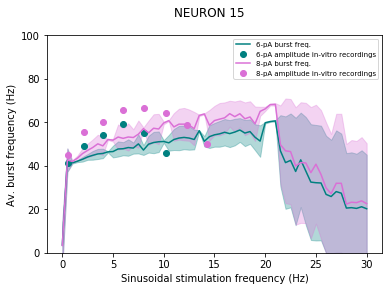

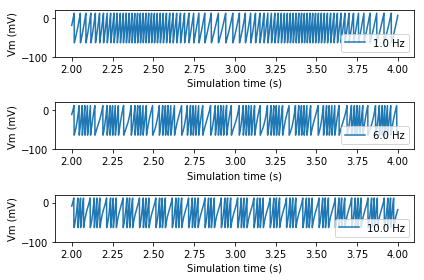

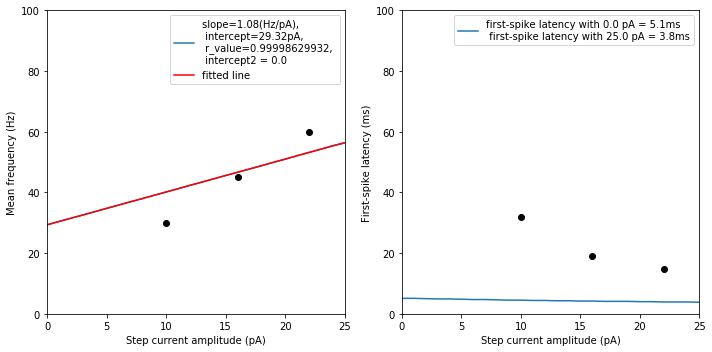


 
NEURON 16
	 Parameter configuration:
{   'a': 9.860355688113379e-10,
    'b': 3.0336712773149645e-10,
    'cm': 2.3339168870062802e-12,
    'delta_t': 0.013871998788304047,
    'erest': -0.061014192859422986,
    'espike': 0.01942086476492474,
    'eth': -0.04659754742293269,
    'grest': 6.199650975879663e-09,
    'tref': 0.001,
    'tw': 0.6201436168158879,
    'vreset': -0.07059046343534763}

 	 Feature and total score:
{   'feature_Burst_Frequency': 511.9034821234357,
    'feature_Latency': 52.949999999999996,
    'feature_Mean_Frequency': 43.0,
    'total_score_obtained_in_UEGO': 607.853482}


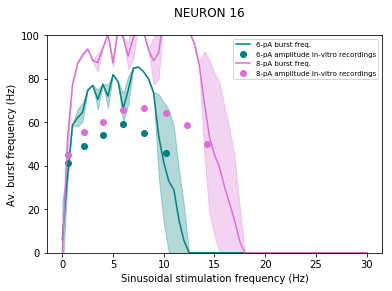

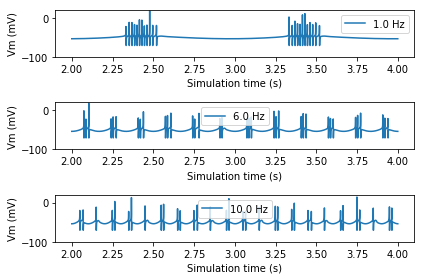

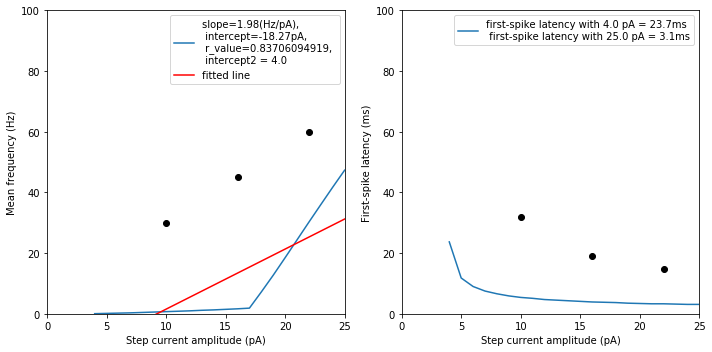


 
NEURON 17
	 Parameter configuration:
{   'a': 9.505751807053072e-10,
    'b': 3.971891857487626e-11,
    'cm': 2.8075370896596384e-12,
    'delta_t': 0.5629660662093825,
    'erest': -0.06101563163581637,
    'espike': 0.009851227657297845,
    'eth': -0.04115166536536517,
    'grest': 4.867271269730346e-11,
    'tref': 0.001,
    'tw': 0.971471731551307,
    'vreset': -0.07499062669227913}

 	 Feature and total score:
{   'feature_Burst_Frequency': 341.9484031586796,
    'feature_Latency': 49.85,
    'feature_Mean_Frequency': 218.0,
    'total_score_obtained_in_UEGO': 609.798403}


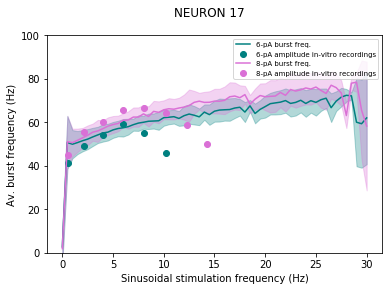

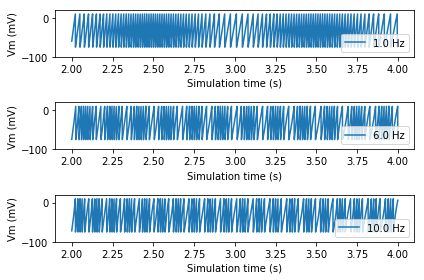

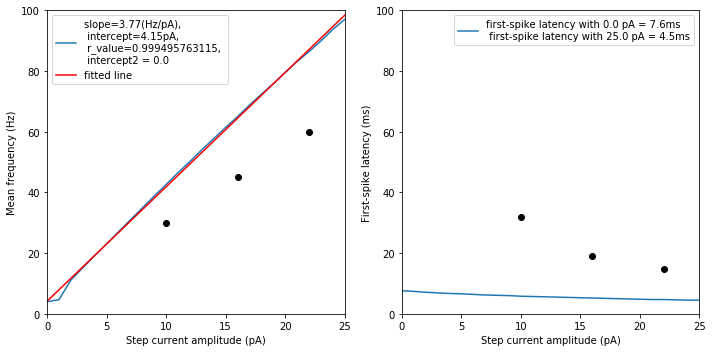


 
NEURON 18
	 Parameter configuration:
{   'a': 6.713584456324034e-10,
    'b': 3.0480561419704576e-10,
    'cm': 1.74375010030707e-12,
    'delta_t': 0.039643009073479944,
    'erest': -0.07265284731514911,
    'espike': -0.018540426235013507,
    'eth': -0.033507278800319035,
    'grest': 9.061634481017134e-09,
    'tref': 0.001,
    'tw': 0.9240245639354042,
    'vreset': -0.047297986876928516}

 	 Feature and total score:
{   'feature_Burst_Frequency': 624.8169131896159,
    'feature_Latency': 56.849999999999994,
    'feature_Mean_Frequency': 34.0,
    'total_score_obtained_in_UEGO': 715.666913}


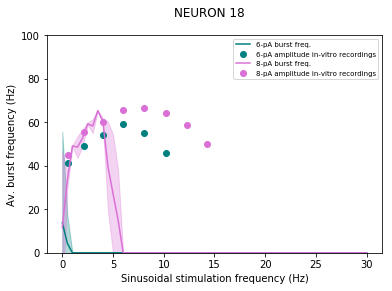

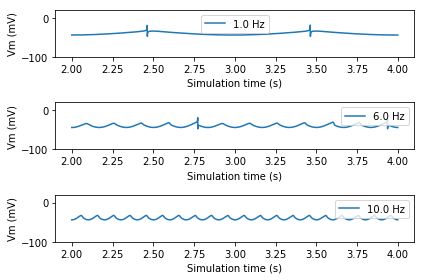

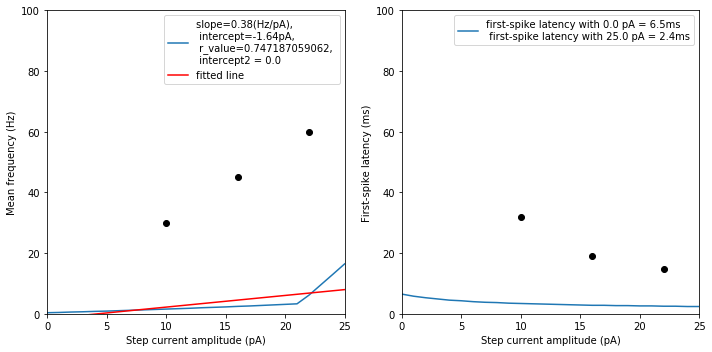


 
NEURON 19
	 Parameter configuration:
{   'a': 2.960400903259269e-11,
    'b': 6.804184815124409e-10,
    'cm': 2.0126803093305832e-12,
    'delta_t': 0.04733263323262459,
    'erest': -0.06826857122416598,
    'espike': 0.0021434279956355287,
    'eth': -0.020021268702600417,
    'grest': 8.851979848712472e-09,
    'tref': 0.001,
    'tw': 0.10895237092613652,
    'vreset': -0.07069401821995801}

 	 Feature and total score:
{   'feature_Burst_Frequency': 660.4720936512716,
    'feature_Latency': 40.05,
    'feature_Mean_Frequency': 98.0,
    'total_score_obtained_in_UEGO': 798.522094}


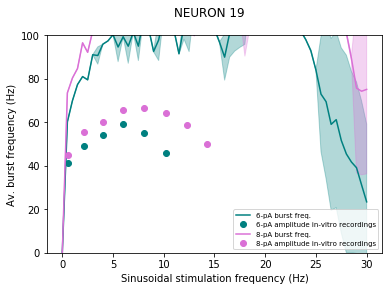

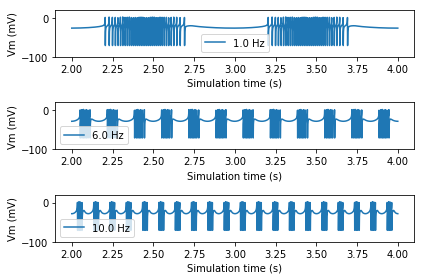

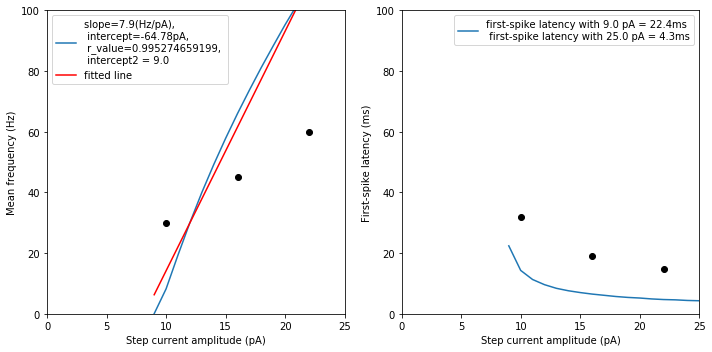


 
NEURON 20
	 Parameter configuration:
{   'a': -5.85614360229604e-10,
    'b': 1.8484057486651986e-10,
    'cm': 4.378754234065261e-12,
    'delta_t': 0.00964210498279568,
    'erest': -0.04602544097397198,
    'espike': 0.003970587853158493,
    'eth': -0.034747813310158165,
    'grest': 7.222435391086991e-09,
    'tref': 0.001,
    'tw': 0.6149407916714055,
    'vreset': -0.0753700003069744}

 	 Feature and total score:
{   'feature_Burst_Frequency': 1269.446279207915,
    'feature_Latency': 264.15000000000003,
    'feature_Mean_Frequency': 66.0,
    'total_score_obtained_in_UEGO': 1599.596279}


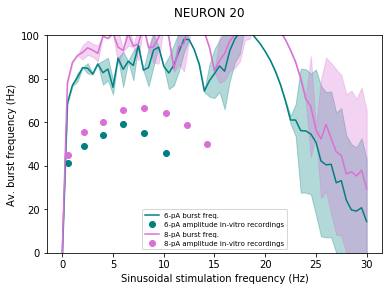

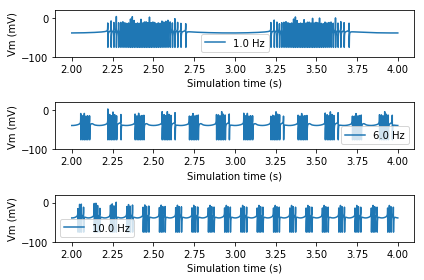

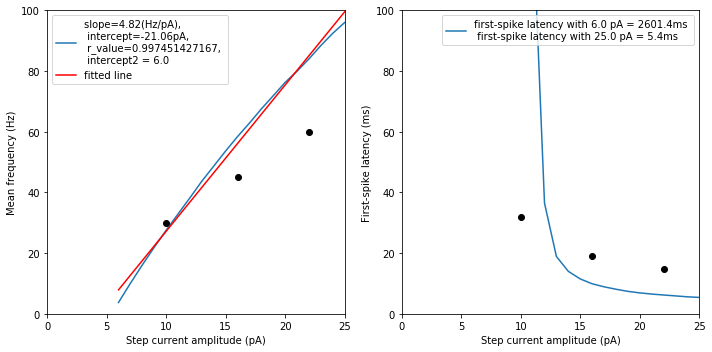


 
NEURON 21
	 Parameter configuration:
{   'a': 2.1683424223041087e-10,
    'b': -7.07969251466221e-10,
    'cm': 3.1064107343183466e-12,
    'delta_t': 0.015101391431213803,
    'erest': -0.05626285237579564,
    'espike': -0.005904643735903966,
    'eth': -0.038468750937949096,
    'grest': 6.531375716592925e-09,
    'tref': 0.001,
    'tw': 0.28196827790206413,
    'vreset': -0.0670494412016734}

 	 Feature and total score:
{   'feature_Burst_Frequency': 537.2011166436093,
    'feature_Latency': 1954.35,
    'feature_Mean_Frequency': 292.0,
    'total_score_obtained_in_UEGO': 2783.551117}


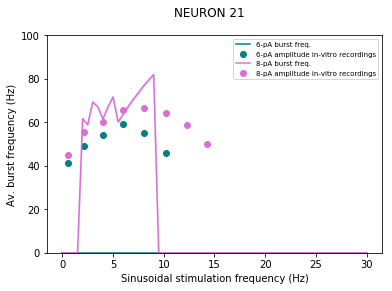

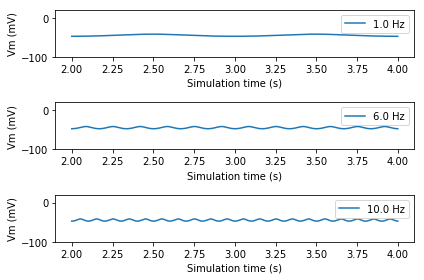

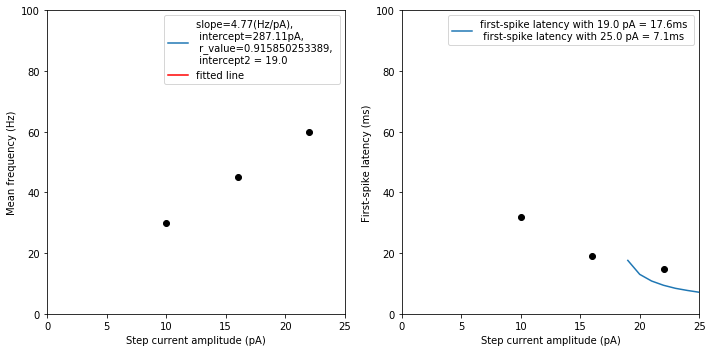


 
NEURON 22
	 Parameter configuration:
{   'a': 4.9046612393234875e-11,
    'b': 9.513460392844031e-10,
    'cm': 7.798556320837359e-13,
    'delta_t': 0.0022117037703909756,
    'erest': -0.04668960119304483,
    'espike': -0.006619982497055841,
    'eth': -0.04004789787858831,
    'grest': 3.872986401566292e-09,
    'tref': 0.001,
    'tw': 0.5734796538404362,
    'vreset': -0.04257677748924182}

 	 Feature and total score:
{   'feature_Burst_Frequency': 710.1189637945221,
    'feature_Latency': 1961.6499999999999,
    'feature_Mean_Frequency': 121.0,
    'total_score_obtained_in_UEGO': 2792.768964}


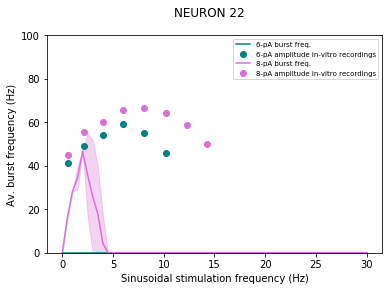

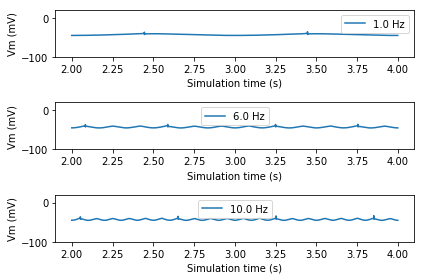

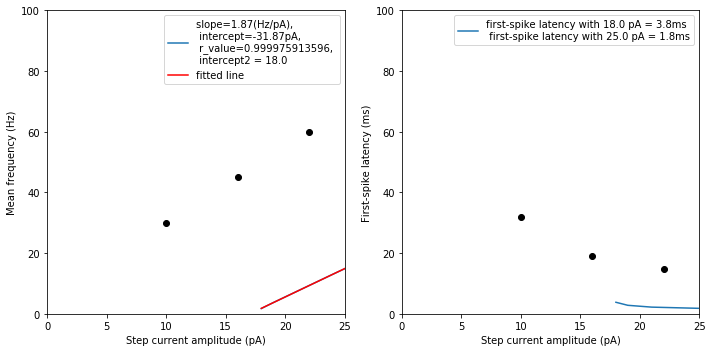


 
NEURON 23
	 Parameter configuration:
{   'a': -5.069561839431242e-10,
    'b': 8.467243651967009e-10,
    'cm': 9.878558073208283e-13,
    'delta_t': 0.006499343822483023,
    'erest': -0.05309826614469508,
    'espike': 0.01868003525419652,
    'eth': -0.04464965999460547,
    'grest': 9.994592124769459e-09,
    'tref': 0.001,
    'tw': 0.8528247719086086,
    'vreset': -0.05268694156229488}

 	 Feature and total score:
{   'feature_Burst_Frequency': 723.1150217163542,
    'feature_Latency': 1960.75,
    'feature_Mean_Frequency': 122.0,
    'total_score_obtained_in_UEGO': 2805.865022}


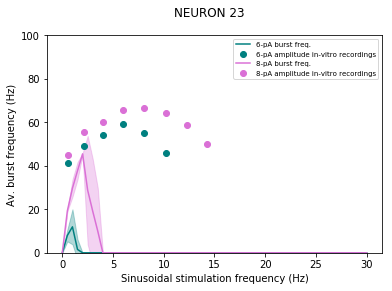

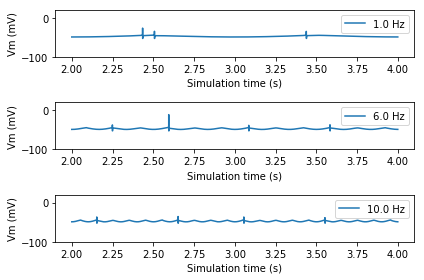

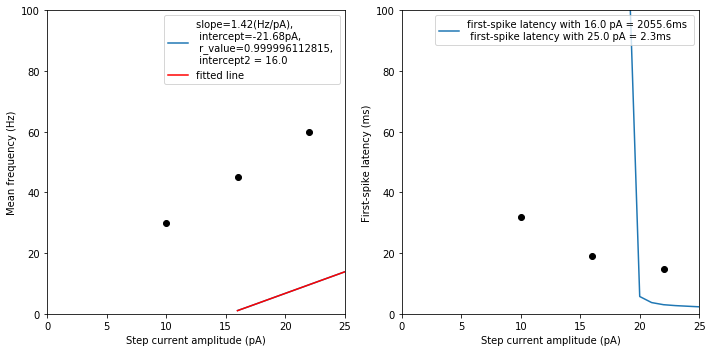


 
NEURON 24
	 Parameter configuration:
{   'a': 8.885888305533453e-10,
    'b': -9.877017450489092e-10,
    'cm': 1.3306214228976113e-13,
    'delta_t': 0.0024958406234318175,
    'erest': -0.0663265017272475,
    'espike': -0.011841426312105888,
    'eth': -0.05999152989317109,
    'grest': 5.72336366454014e-09,
    'tref': 0.001,
    'tw': 0.5506061985207004,
    'vreset': -0.05970566749924521}

 	 Feature and total score:
{   'feature_Burst_Frequency': 770.43,
    'feature_Latency': 1956.25,
    'feature_Mean_Frequency': 918.0,
    'total_score_obtained_in_UEGO': 3644.68}


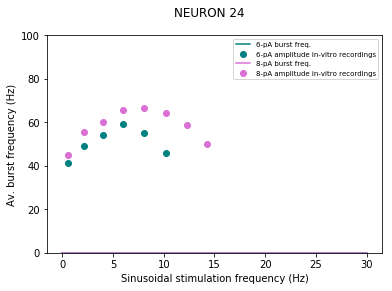

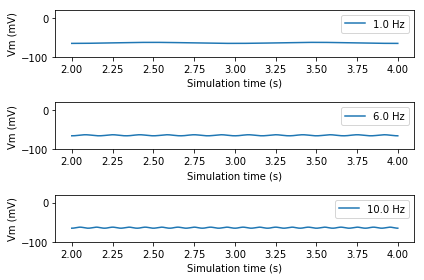

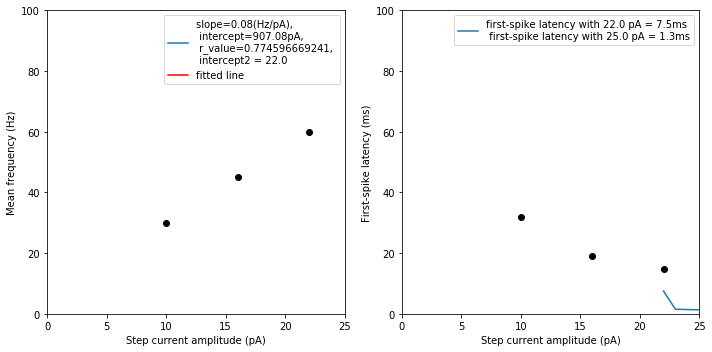


 
NEURON 25
	 Parameter configuration:
{   'a': -4.0165184543749986e-10,
    'b': -6.839824060613925e-11,
    'cm': 6.985333664088788e-13,
    'delta_t': 0.001,
    'erest': -0.07778234787504298,
    'espike': -0.0004304292241678158,
    'eth': -0.029018746530720414,
    'grest': 7.270087787186214e-09,
    'tref': 0.001,
    'tw': 0.41060061967312633,
    'vreset': -0.04823380506724272}

 	 Feature and total score:
{   'feature_Burst_Frequency': 770.43,
    'feature_Latency': 2934.45,
    'feature_Mean_Frequency': 135.0,
    'total_score_obtained_in_UEGO': 3839.88}


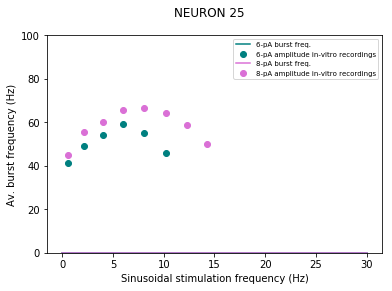

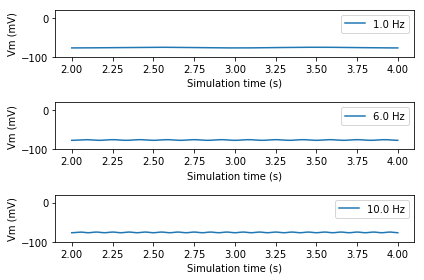

There is no spike generated to calculate the I-F slope


In [15]:
for cont in range(0,len(dict_total_ind)): #For analysing the whole population of neurons
    neuron_config = dict_total_ind[cont] #Select one neuron from the population
    identifier = 'NEURON {}'.format(cont+1) #Identify the neuron
    print '\n \n', identifier
    
    # Create a dictionary that will accumulate all the information of the neuron
    dict_individual = functions.create_dict_case('{}'.format(identifier))

    # This step transforms the unit values of the parameters from the International System units to the NEST simulator units.
    parameters_id = ['a','espike','eth','b','cm','erest','grest','delta_t','tw','vreset','tref'] # parameter order from the file generated by the algorithm
    IS_params_list = dict(zip(parameters_id, neuron_config))
    IS_params_list = [IS_params_list]
    to_nest_params_list = []
    for i in range(len(IS_params_list)):
        param_dict = {
            'g_L':IS_params_list[i]['grest']*1.e9,
            'E_L':IS_params_list[i]['erest']*1.e3,
            'V_reset':IS_params_list[i]['vreset']*1.e3,
            'V_th':IS_params_list[i]['eth']*1.e3,
            't_ref':IS_params_list[i]['tref']*1.e3,
            'C_m':IS_params_list[i]['cm']*1.e12,
            'V_peak':IS_params_list[i]['espike']*1.e3,
            'tau_w':IS_params_list[i]['tw']*1.e3,
            'Delta_T':IS_params_list[i]['delta_t']*1.e3,
            'a':IS_params_list[i]['a']*1.e9,
            'b':IS_params_list[i]['b']*1.e9 }    
        to_nest_params_list.append(param_dict)
        dict_individual['param_configuration'] = IS_params_list[0] #Save the parameter configuration in the dictionary
        dict_individual['scores']['total_score_obtained_in_UEGO'] = dict_total_fit[cont] #Save the score of the neuron in the dictionary
        #pp.pprint(to_nest_parameter_list)
 
    # Simulation of the neuron and calculation of the spiking resonance feature (saved in the neuron dictionary "dict_individual")
    functions.score_calculation(dict_individual,config_file,simulation_time=22.5) 
    print '\t Parameter configuration:'
    pp.pprint(dict_individual['param_configuration'])
    print '\n \t Feature and total score:'
    pp.pprint(dict_individual['scores'])
    
    #Representation of the features
    functions.score_representation(dict_individual, config_file, simulation_time=22.5,file_name='{}'.format(identifier),show=show,savefig=savefig)
